# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_datadf=pd.merge(study_results,mouse_metadata,on="Mouse ID")
#merged_datadf=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="outer")

# Display the data table for preview
merged_datadf


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [111]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
copy_mergeddf = merged_datadf.loc[merged_datadf.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
copy_mergeddf
#merged_datadf.set_index(["Mouse ID","Timepoint"])

array(['g989'], dtype=object)

In [112]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates2=merged_datadf.loc[merged_datadf["Mouse ID"]=="g989"]
duplicates2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [113]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
#clean_study_data_complete.head()
cleandf=merged_datadf.drop_duplicates(subset=['Mouse ID','Timepoint'])
cleandf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [114]:
# Checking the number of mice in the clean DataFrame.
mice_count=cleandf['Mouse ID'].nunique()
print(mice_count)

249


## Summary Statistics

In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleandf['Tumor Volume (mm3)'].describe
means = cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance=cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standrad_deviation=cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Sem=cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

# Assemble the resulting series into a single summary DataFrame.


In [116]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
Summary_Statistics=cleandf.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
Summary_Statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [117]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Summary_Statistics=Summary_Statistics.rename(columns={
    'mean':'Mean Tumor Volume',
    'median':'Median Tumor Volume',
    'var':'Tumor Volume Variance',
    'std':'Tumor Volume Std. Dev.',
    'sem':'Tumor Volume Std. Err'})
pd.DataFrame(Summary_Statistics)


Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.393463           50.909965             43.138803   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                           
             Tumor Volume Std. Dev. Tumor Volume Std. Err  
Drug Regimen                                               
Capomulin                  4.994774              0.329346  
Ceftamin                   6.268188              0.469821  
Infubinol                  6.567243              0.492236  
Ketapril                   8.279709              0.603860  
Naftisol                   8.134708              0.596466  
Placebo                    7.821003              0.581331  
Propriva                   6.568014              0.525862  
Ramicane                   4.846308              0.320955  
Stelasyn                   7.710419              0.573111  
Zoniferol                  6.966589              0.516398

In [118]:
import numpy as np

In [119]:
Mice_Drug_Regimen=cleandf.groupby('Drug Regimen')

In [120]:
Mice_Drug_Regimen['Mouse ID'].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

In [121]:
Number_of_Mice=Mice_Drug_Regimen['Mouse ID'].count()
x_axis=np.arange(len(Number_of_Mice))

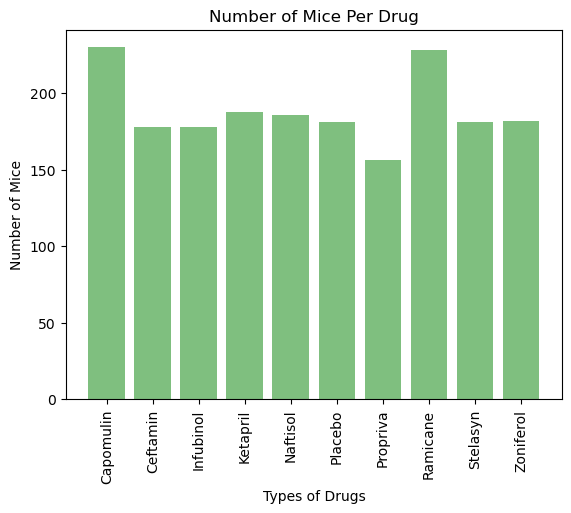

In [122]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.bar(x_axis,Number_of_Mice,color='green',alpha=.5,align='center')
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation="vertical")
plt.title("Number of Mice Per Drug")
plt.xlabel("Types of Drugs")
plt.ylabel("Number of Mice")
plt.show()

In [123]:
#cleandf['Drug Regimen'].value_counts()
#plt.bar(cleandf.index.values,cleandf.values)
#plt.xlabel("Drug Regimen")
#plt.xticks(rotation=90)
#plt.ylabel("# of Observed Mouse Timepoints")
#plt.show()

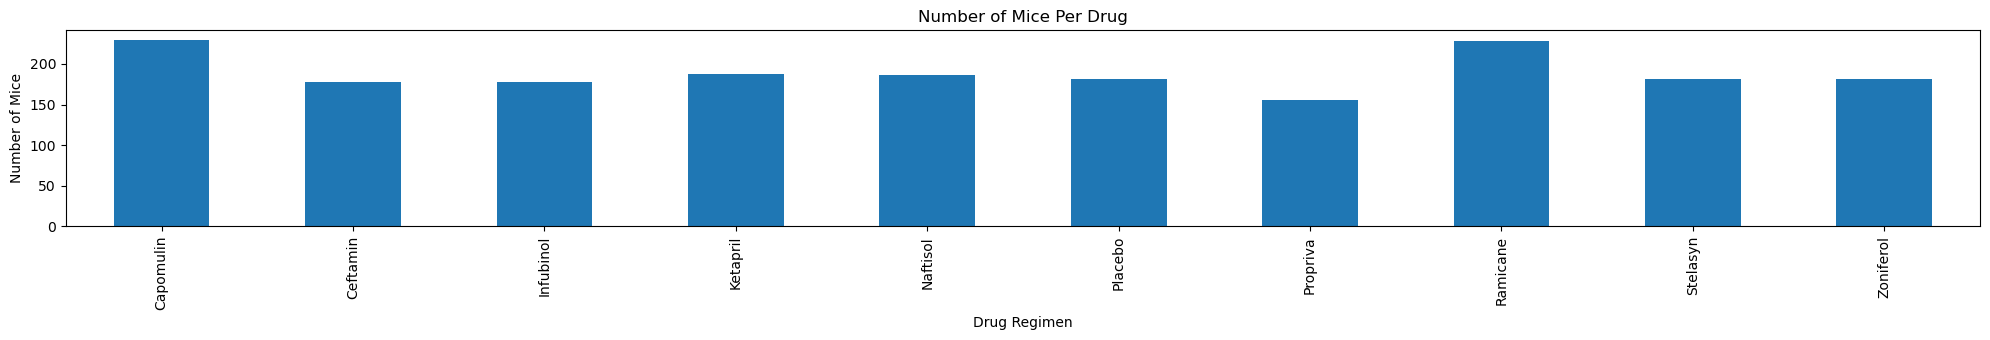

In [124]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pd_Mice_Drug_Regime=Number_of_Mice.plot(kind="bar",figsize=(20,3.5))
plt.title("Number of Mice Per Drug")
plt.ylabel("Number of Mice")
plt.tight_layout()


In [125]:
Gender=cleandf.groupby('Sex')['Sex'].count()
print(Gender)

Sex
Female    930
Male      958
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Gender of Mice')

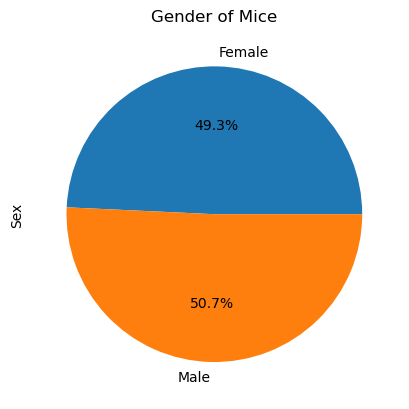

In [126]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
Gender_Pie=Gender.plot(kind="pie",autopct="%1.1f%%")
Gender_Pie.set_title(label="Gender of Mice")


# Get the unique mice with their gender


# Make the pie chart


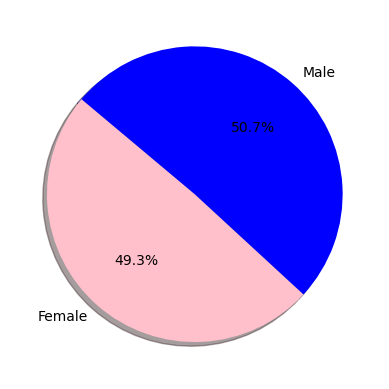

In [127]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
Mice_labels=["Female","Male"]
colors=["pink","blue"]
explode=[0,0]
plt.pie(Gender,explode=explode,labels=Mice_labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=140)
plt.show()


## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
#max_tumor = clean_study_data_complete.groupby(["Mouse ID"])['Timepoint'].max()

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cleandf.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#Max_Timepoint[Max_Timepoint['Drug Regimen']]="Capomulin","Ramicane","Infubinol","Ceftamin,:]
merged_data = max_tumor.merge(cleandf,on=['Mouse ID','Timepoint'],how="left")

In [184]:
filtered_df = merged_data[merged_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
updated_filtered=filtered_df.drop(columns=['Mouse ID','Timepoint','Metastatic Sites','Sex','Age_months','Weight (g)'])

In [188]:
updated_filtered

,Tumor Volume (mm3),Drug Regimen
0,67.973419,Infubinol
1,65.525743,Infubinol
3,62.999356,Ceftamin
6,38.407618,Ramicane
7,43.047543,Ramicane
...,...,...
239,68.594745,Ceftamin
240,31.896238,Capomulin
241,64.729837,Ceftamin
245,30.638696,Ramicane


In [189]:
drug_groups=[updated_filtered[updated_filtered["Drug Regimen"]==drug]["Tumor Volume (mm3)"] for drug in ["Capomulin","Ramicane","Infubinol","Ceftamin"]]

In [129]:
# Put treatments into a list for for loop (and later for plot labels)
regimen=['Capomulin','Ramicane','Infubinol','Ceftmain']

# Create empty list to fill with tumor vol data (for plotting)
x=[]

#Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:
    final_tumor_volume=cleandf.loc[cleandf["Drug Regimen"]==drug,"Tumor Volume (mm3)"]

    # add subset
    x.append(final_tumor_volume)

    # Determine outliers using upper and lower bounds
    quartiles=final_tumor_volume.quantile([0.25,0.5,0.75])
    lower_quartile=quartiles[0.25]
    upper_quartile=quartiles[0.75]
    iqr=upper_quartile-lower_quartile
    lower_bound=lower_quartile-(1.5*iqr)
    upper_bound=upper_quartile+(1.5*iqr)
    outliers=final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftmain's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [161]:
print(x)

[0       45.000000
226     45.000000
227     45.000000
228     45.000000
229     45.000000
          ...    
1854    40.728578
1859    38.125164
1878    47.685963
1888    41.581521
1889    31.023923
Name: Tumor Volume (mm3), Length: 230, dtype: float64, 58      45.000000
59      45.000000
60      45.000000
61      45.000000
62      45.000000
          ...    
1867    40.667713
1870    29.128472
1874    37.225650
1879    32.978522
1885    33.562402
Name: Tumor Volume (mm3), Length: 228, dtype: float64, 29      45.000000
30      45.000000
31      45.000000
32      45.000000
33      45.000000
          ...    
1789    66.196912
1794    66.083066
1802    62.435404
1804    67.973419
1806    60.918767
Name: Tumor Volume (mm3), Length: 178, dtype: float64, Series([], Name: Tumor Volume (mm3), dtype: float64)]


C:\Users\Spartan117\AppData\Local\Temp\ipykernel_12040\2940106324.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(drug_groups,


Text(0.5, 1.0, 'Tummor Volumme by Drug Regimen')

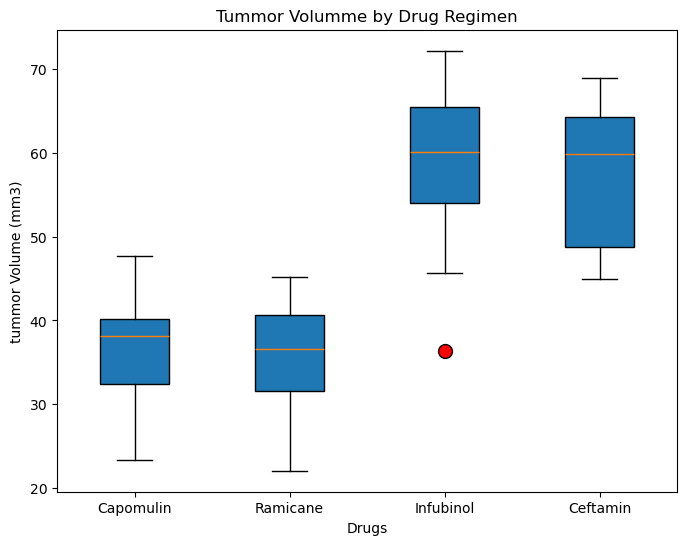

In [207]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8,6))
plt.boxplot(drug_groups, 
            labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], 
            patch_artist=True, 
            flierprops=dict(marker='o', color='red', markerfacecolor='red', markersize=10))
plt.xlabel("Drugs")
plt.ylabel("tummor Volume (mm3)")
plt.title("Tummor Volumme by Drug Regimen")


## Line and Scatter Plots

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin



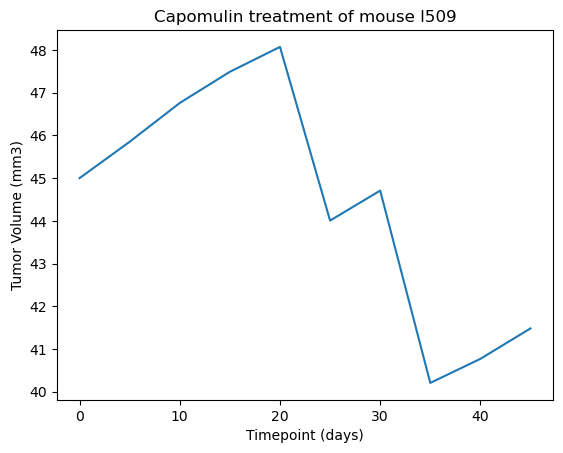

In [47]:
Capoulin_Drug= merged_datadf.loc[merged_datadf['Drug Regimen'] == "Capomulin"]
mousedata = Capoulin_Drug.loc[Capoulin_Drug['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

In [48]:
print(Capoulin_Drug)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
226      j246          0           45.000000                 0    Capomulin   
227      r554          0           45.000000                 0    Capomulin   
228      s185          0           45.000000                 0    Capomulin   
229      b742          0           45.000000                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1854     s710         45           40.728578                 1    Capomulin   
1859     j119         45           38.125164                 1    Capomulin   
1878     i557         45           47.685963                 1    Capomulin   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female

          Tumor Volume (mm3)  Weight (g)
Mouse ID                                
b128               41.963636        22.0
b742               40.083699        21.0
f966               36.505973        17.0
g288               41.990097        19.0
g316               44.613344        22.0
i557               44.805810        24.0
i738               39.141053        20.0
j119               44.465236        23.0
j246               43.216925        21.0
l509               44.434474        21.0
l897               42.507261        19.0
m601               34.847470        17.0
m957               39.049816        19.0
r157               45.798970        25.0
r554               36.509212        17.0
r944               43.367364        25.0
s185               34.559143        17.0
s710               42.803733        23.0
t565               39.328725        17.0
u364               39.887495        17.0
v923               41.581595        21.0
w150               41.384825        23.0
w914            

Text(0.5, 1.0, 'Weight vs Capolumin Avg Tumor Vol')

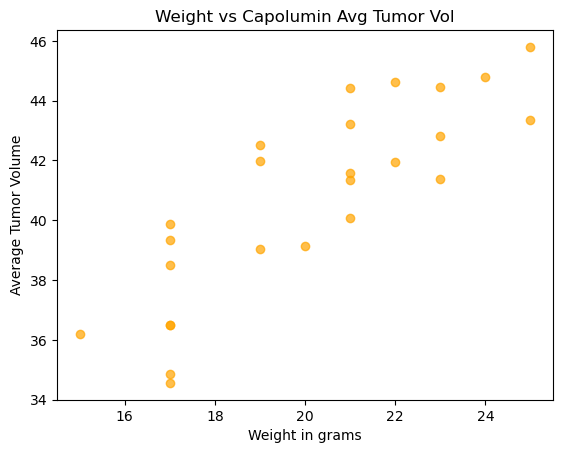

In [131]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Ms_weight_vs_TV=Capoulin_Drug.groupby('Mouse ID').agg({'Tumor Volume (mm3)':'mean','Weight (g)':'mean'})
print(Ms_weight_vs_TV)
plt.scatter(Ms_weight_vs_TV['Weight (g)'],Ms_weight_vs_TV["Tumor Volume (mm3)"],color='orange',alpha=0.7)
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume")
plt.title("Weight vs Capolumin Avg Tumor Vol")

In [25]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
st.pearsonr(Ms_weight_vs_TV['Tumor Volume (mm3)'],Ms_weight_vs_TV["Weight (g)"])

PearsonRResult(statistic=0.8419363424694721, pvalue=1.3225722434712388e-07)

Text(0.5, 1.0, 'Weight vs Capolumin Avg Tumor Vol')

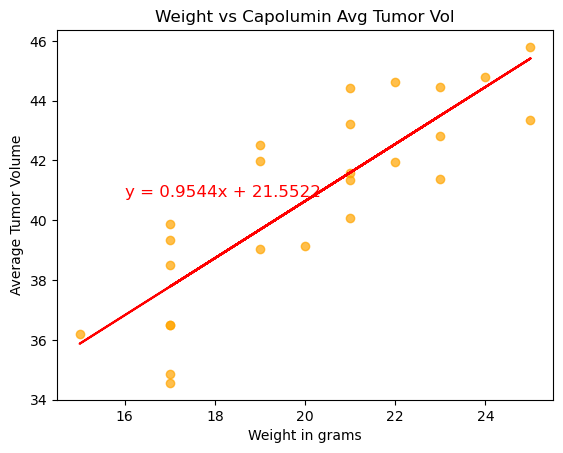

In [156]:
st.pearsonr(Ms_weight_vs_TV['Tumor Volume (mm3)'],Ms_weight_vs_TV["Weight (g)"])
x_values=Ms_weight_vs_TV['Weight (g)']
y_values=Ms_weight_vs_TV['Tumor Volume (mm3)']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,color='red')
plt.annotate(line_eq, (min(x_values) + 1, max(y_values) - 5), fontsize=12, color="red")
plt.scatter(Ms_weight_vs_TV['Weight (g)'],Ms_weight_vs_TV["Tumor Volume (mm3)"],color='orange',alpha=0.7)
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume")
plt.title("Weight vs Capolumin Avg Tumor Vol")